In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_det_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
d = pd.read_csv('df_to_machine_learning.csv', index_col=False).drop(['uid','voteDate'], axis=1).dropna()

In [3]:
d = d.dropna()
d

,numVotes,stillExists,liked,disliked,liked_churned_people,vote,Happiness,activity,likes,dislikes,txt_len
0,4,True,6,0,0,2.500000,-0.000000,29,7.500000,1.000000,114.500000
1,72,True,60,12,1,2.250000,-0.000805,356,5.428571,4.785714,59.571429
2,14,False,1,0,0,3.142857,0.006202,0,6.000000,0.000000,92.000000
3,14,False,1,0,0,3.142857,0.006202,0,6.000000,0.000000,92.000000
4,22,True,6,5,0,3.454545,-0.001876,370,3.333333,0.888889,85.555556
...,...,...,...,...,...,...,...,...,...,...,...
2585,4,True,11,0,0,2.750000,-0.257143,1,1.000000,0.500000,56.500000
2586,3,True,8,4,0,3.666667,0.285714,3,10.333333,0.000000,115.333333
2587,5,True,28,8,0,2.600000,-0.600000,2,10.666667,5.666667,87.000000
2588,1,True,1,0,0,4.000000,0.000000,0,15.000000,0.000000,386.000000


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2590 entries, 0 to 2589
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   numVotes              2590 non-null   int64  
 1   stillExists           2590 non-null   bool   
 2   liked                 2590 non-null   int64  
 3   disliked              2590 non-null   int64  
 4   liked_churned_people  2590 non-null   int64  
 5   vote                  2590 non-null   float64
 6   Happiness             2590 non-null   float64
 7   activity              2590 non-null   int64  
 8   likes                 2590 non-null   float64
 9   dislikes              2590 non-null   float64
 10  txt_len               2590 non-null   float64
dtypes: bool(1), float64(5), int64(5)
memory usage: 225.1 KB


In [5]:
d.stillExists = ~d.stillExists
d.columns = ['numVotes', 'churned', 'liked', 'disliked', 'liked_churned_people',
       'vote', 'HappinessEvolution', 'LifeSpan', 'positive_feedback_received', 'negative_feedback_received', 'comment_length']
d = d[d.LifeSpan > 10]

In [6]:
d['CommitmentRate'] = (d.numVotes + d.liked + d.disliked) / d.LifeSpan
d['CommitmentRate'] = d['CommitmentRate'].replace(np.inf, 0)

<ipython-input-6-09ad60686e32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['CommitmentRate'] = (d.numVotes + d.liked + d.disliked) / d.LifeSpan
<ipython-input-6-09ad60686e32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['CommitmentRate'] = d['CommitmentRate'].replace(np.inf, 0)


In [7]:
d['Activity_freq'] = d.numVotes / d.LifeSpan
d['Activity_freq'] = d['Activity_freq'].replace(np.inf, 0)

<ipython-input-7-34b49e6d6c60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Activity_freq'] = d.numVotes / d.LifeSpan
<ipython-input-7-34b49e6d6c60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['Activity_freq'] = d['Activity_freq'].replace(np.inf, 0)


# Dataframe Code book :
- numVotes : number of votes 
- churned : if the employee has left his company
- liked: number of comments liked by the user
- disliked: number of comments disliked by the user
- liked_churned_people : if the employee has liked a person who left the company
- vote : average value of votes left by the user (1 : worst mood, 4 : best mood)
- happinessEvolution : represent the evolution of user satisfaction from negative value (user sadder over time)to positive value (user happier over time), 0 == no evolution over time
- LifeSpan : user lifespan
- positive_feedback_received: average number of positive feedback received by comment.
- negative_feedback_received: average number of negative feedback received by comment.
- comment_length : average length of user's comments
- CommitmentRate : The greatest the value is the more commited the user is CR = (nvote+liked+disliked) / Activity
- Activity_freq : numVotes / user LifeSpan

In [8]:
d.describe()

,numVotes,liked,disliked,liked_churned_people,vote,HappinessEvolution,LifeSpan,positive_feedback_received,negative_feedback_received,comment_length,CommitmentRate,Activity_freq
count,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000,1982.000000
mean,82.896065,125.655903,23.550454,0.573663,2.915418,0.001533,533.026741,7.147460,1.241539,98.486966,1.919747,0.703228
std,86.494139,224.177322,59.688280,0.494669,0.664815,0.014304,16538.048432,5.305016,1.500659,78.600822,2.470563,0.914395
min,0.000000,0.000000,0.000000,0.000000,1.000000,-0.104329,11.000000,0.000000,0.000000,0.750000,0.000144,0.000000
25%,22.000000,15.000000,1.000000,0.000000,2.555556,-0.001605,56.000000,3.148810,0.250000,47.906250,0.545922,0.260228
50%,54.000000,51.000000,6.000000,1.000000,2.998208,0.000277,133.000000,5.839744,0.765332,77.250000,1.186582,0.529799
75%,115.000000,142.000000,21.000000,1.000000,3.365909,0.003052,237.000000,10.000000,1.709531,121.964286,2.293052,0.853609
max,740.000000,3151.000000,891.000000,1.000000,4.000000,0.139098,736404.000000,34.000000,17.000000,880.500000,38.294118,16.727273


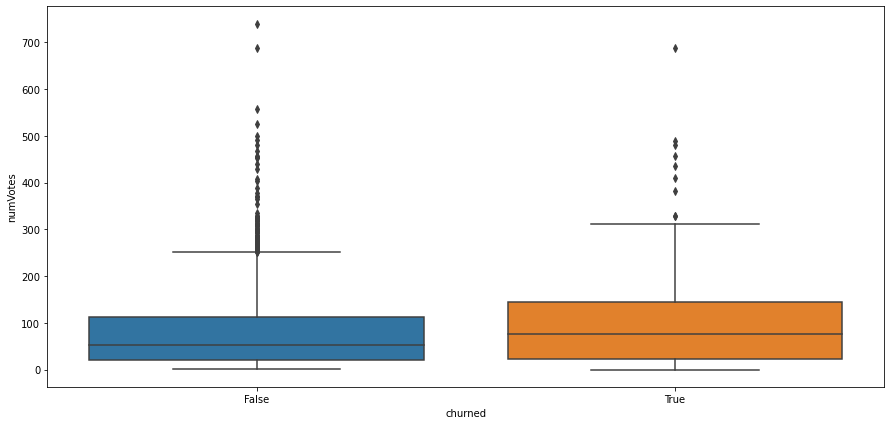

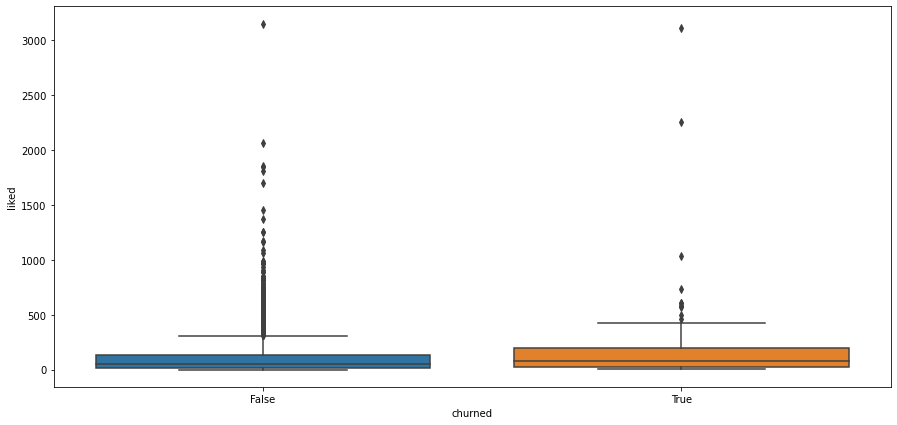

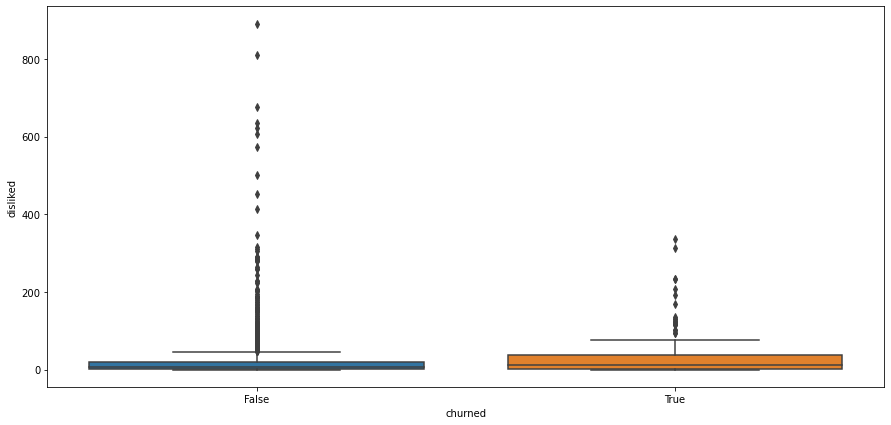

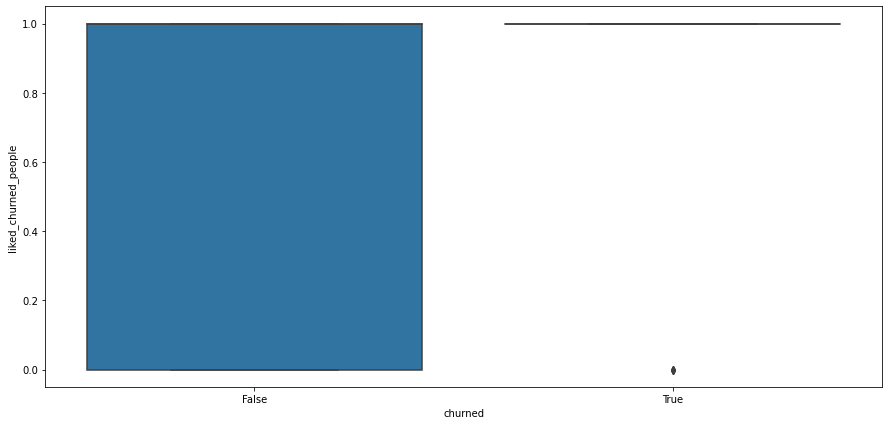

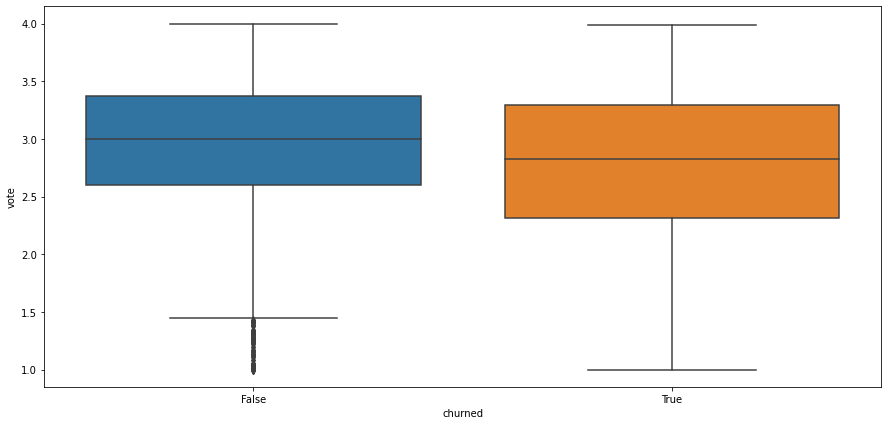

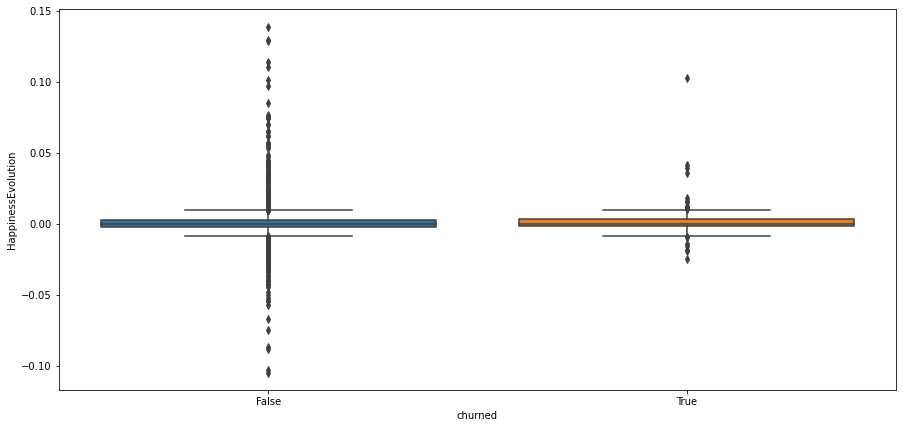

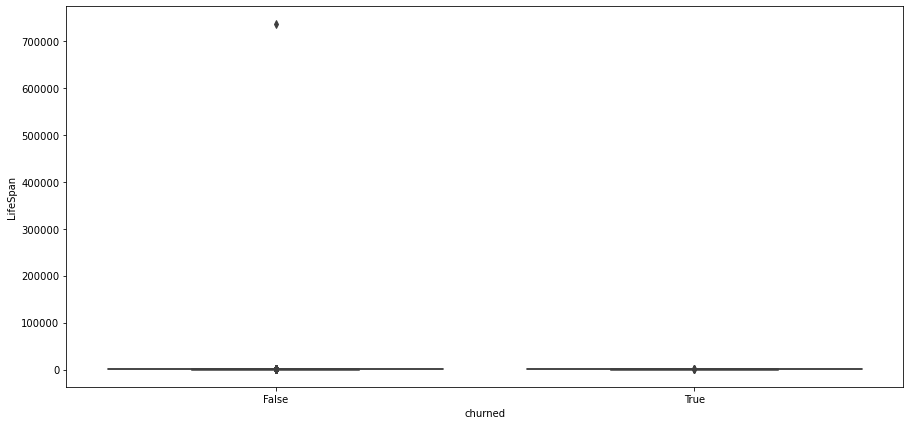

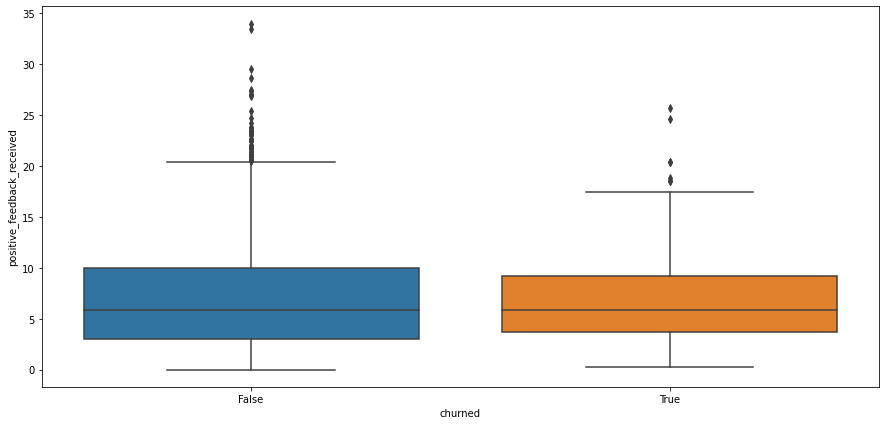

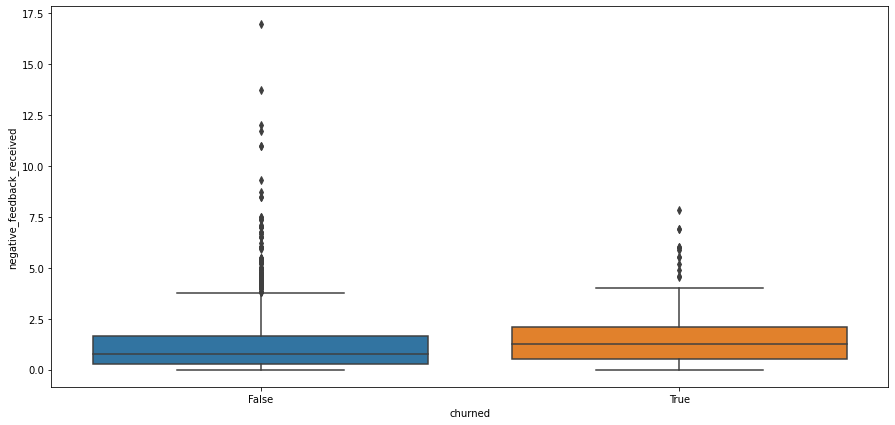

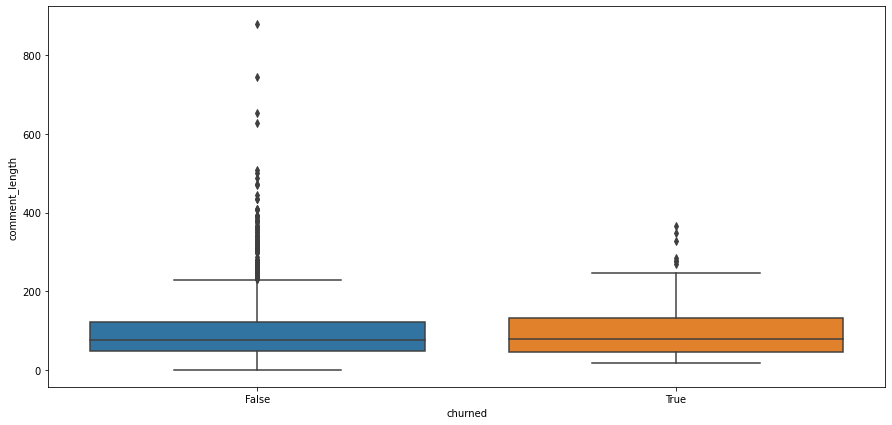

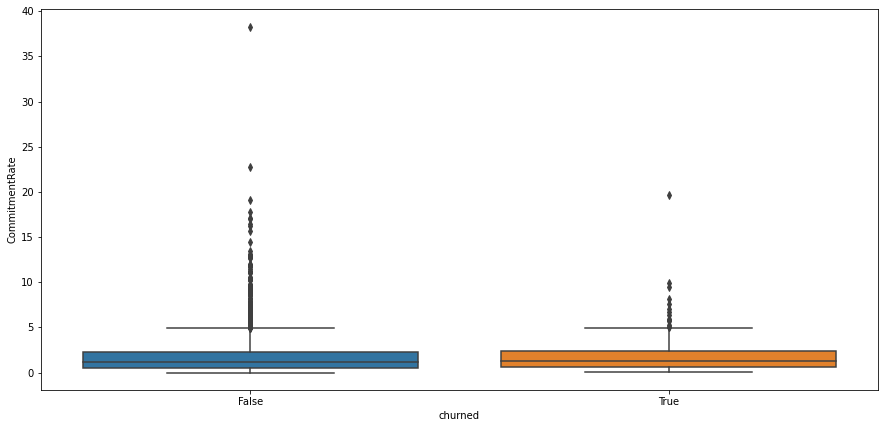

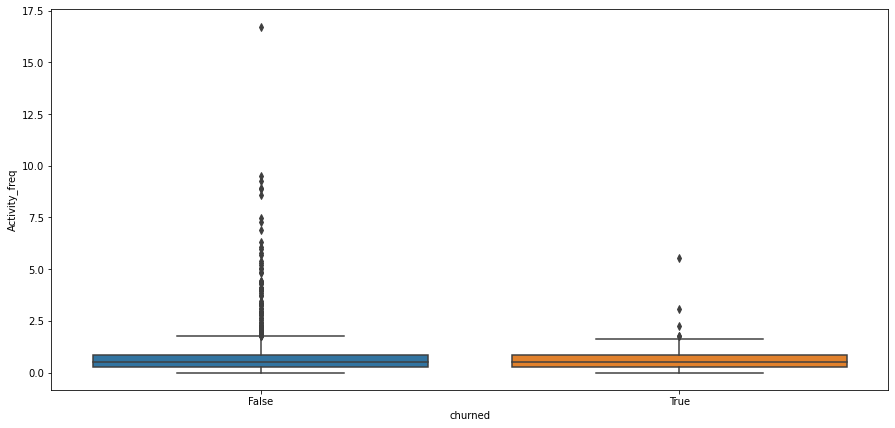

In [9]:
for col in d.columns:
    if col != 'churned':
        fig, ax = plt.subplots(figsize=(15,7))
        sns.boxplot(data=d, x="churned", y=col)
        plt.show()

In [10]:
d.groupby('churned').mean()

,numVotes,liked,disliked,liked_churned_people,vote,HappinessEvolution,LifeSpan,positive_feedback_received,negative_feedback_received,comment_length,CommitmentRate,Activity_freq
churned,,,,,,,,,,,,
False,81.014301,121.797580,22.605061,0.538504,2.931423,0.001468,563.308581,7.144830,1.207533,98.243621,1.915359,0.709476
True,103.756098,168.426829,34.030488,0.963415,2.737991,0.002255,197.341463,7.176619,1.618511,101.184525,1.968387,0.633967


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


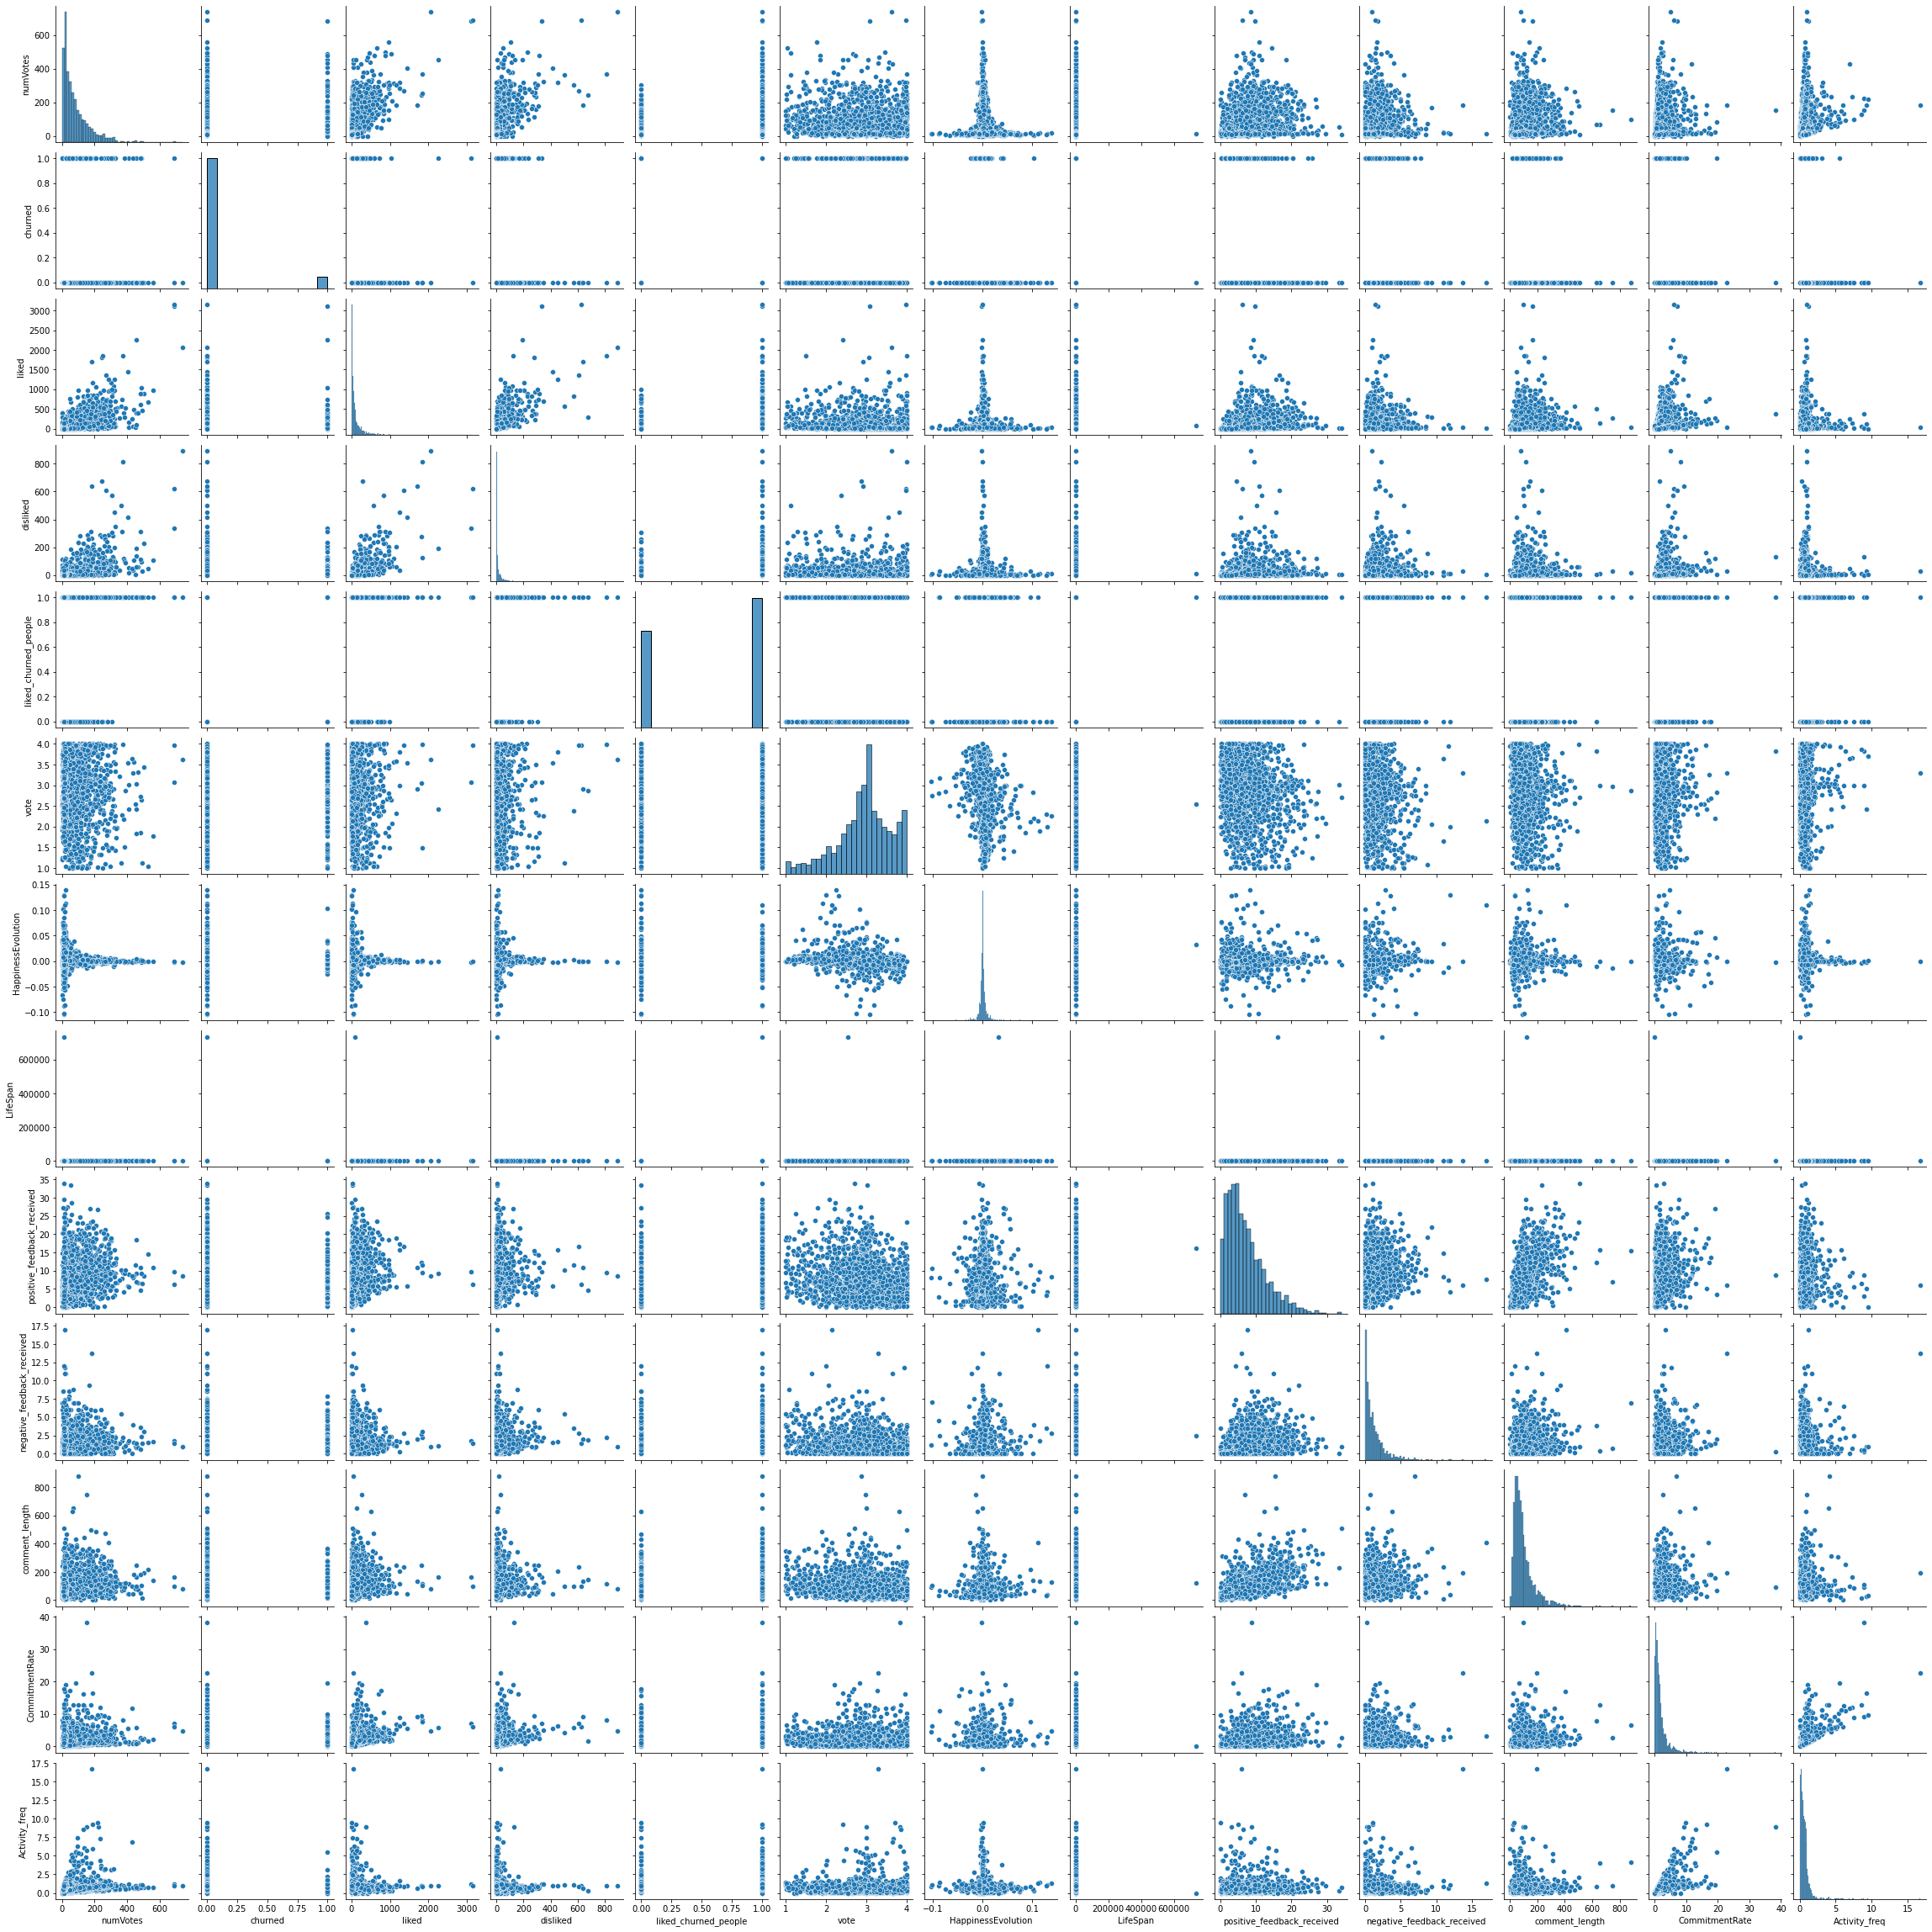

In [55]:
sns.pairplot(d)

<AxesSubplot:>

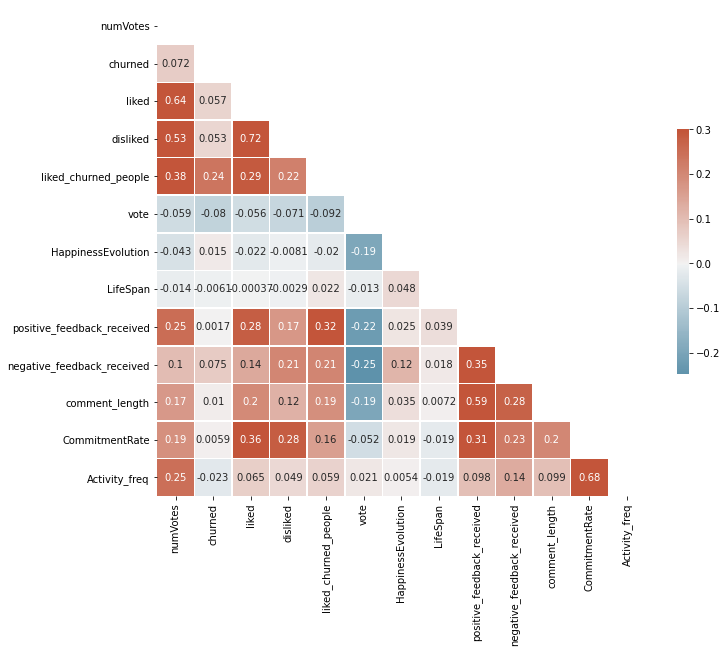

In [12]:
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [13]:
X = d.drop(columns=['churned'])
y = d[['churned']]

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.9, test_size=.1, random_state=42)
y_train = y_train.values.reshape(-1)

In [14]:
clf = LogisticRegressionCV(cv=5, scoring="f1", solver ='newton-cg').fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
F1 = 2 * (precision * recall) / (precision + recall)
F1

/home/osboxes/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-14-6b10726d345b>:5: RuntimeWarning: invalid value encountered in double_scalars
  F1 = 2 * (precision * recall) / (precision + recall)


nan

In [15]:
recall

0.0

In [16]:
neigh = KNeighborsClassifier(n_neighbors=1)
cross_val_score(neigh, X_train, y_train, cv=10, scoring='f1').mean()

0.2672670989599461

In [17]:
parameters = {'n_neighbors': list(range(1,31))}
grid = GridSearchCV(neigh, parameters, verbose=1, return_train_score=True, scoring='f1')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             return_train_score=True, scoring='f1', verbose=1)

In [18]:
res = grid.cv_results_
k = res['param_n_neighbors']
train_score = res['mean_train_score']
test_score = res['mean_test_score']

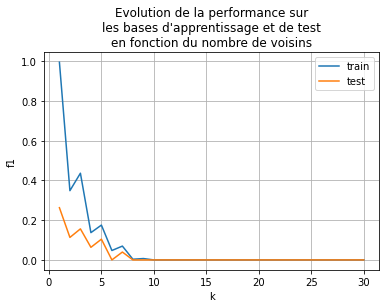

In [19]:
df_score = pd.DataFrame(dict(k=k, test=test_score, train=train_score))
ax = df_score.plot(x='k', y='train', figsize=(6, 4))
df_score.plot(x='k', y='test', ax=ax, grid=True)
ax.set_title("Evolution de la performance sur\nles bases d'apprentissage et de test" +
             "\nen fonction du nombre de voisins")
ax.set_ylabel("f1");

In [20]:
y_pred = grid.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[165,  12],
       [ 16,   6]])

In [21]:
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

In [22]:
y_test.value_counts()

churned
False      177
True        22
dtype: int64

In [23]:
confusion_matrix(y_test, y_pred)

array([[165,  12],
       [ 16,   6]])

In [24]:
recall = recall_score(y_test, y_pred, average='binary')
recall

0.2727272727272727

# The precision is the ratio tp / (tp + fp) 
## The best value is 1 and the worst value is 0.

In [25]:
precision = precision_score(y_test, y_pred, average='binary')
precision

0.3333333333333333

# The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution # of precision and recall to the F1 score are equal. The formula for the F1 score is:

In [26]:
y_pred = neigh.predict(X_test)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.3

In [27]:
y_test.value_counts()

churned
False      177
True        22
dtype: int64

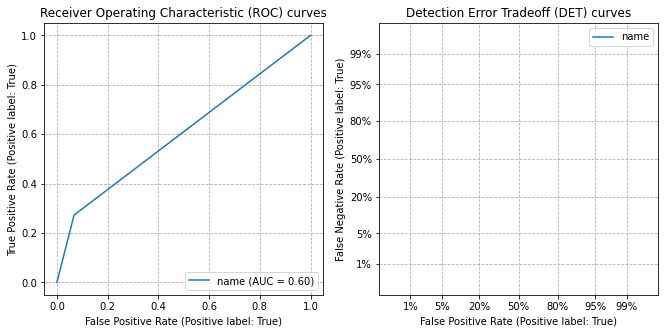

In [28]:
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

plot_roc_curve(grid, X_test, y_test, ax=ax_roc, name='name')
plot_det_curve(grid, X_test, y_test, ax=ax_det, name="name")


ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_det.set_title('Detection Error Tradeoff (DET) curves')

ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')

plt.legend()
plt.show()

In [29]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [30]:
y_pred = clf.predict(X_test)

In [31]:
#y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
F1 = 2 * (precision * recall) / (precision + recall)
F1

/home/osboxes/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-31-51c04df344a4>:4: RuntimeWarning: invalid value encountered in double_scalars
  F1 = 2 * (precision * recall) / (precision + recall)


nan

In [32]:
confusion_matrix(y_test, y_pred)

array([[177,   0],
       [ 22,   0]])

In [33]:
y_test.value_counts()

churned
False      177
True        22
dtype: int64

## The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

## The best value is 1 and the worst value is 0.

In [34]:
recall_score(y_test, y_pred, average='binary')

0.0

In [35]:
clf = RandomForestClassifier()
#print(cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_micro').mean())
parameters = { 
    'n_estimators': [8000],
    'max_features': ['sqrt', 'log2'],
    'n_jobs':[-1]
}
grid_rfc = GridSearchCV(clf, parameters, verbose=2, return_train_score=True, scoring='f1', n_jobs=-1,)
grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [8000], 'n_jobs': [-1]},
             return_train_score=True, scoring='f1', verbose=2)

In [36]:
y_pred = grid_rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[177,   0],
       [ 17,   5]])

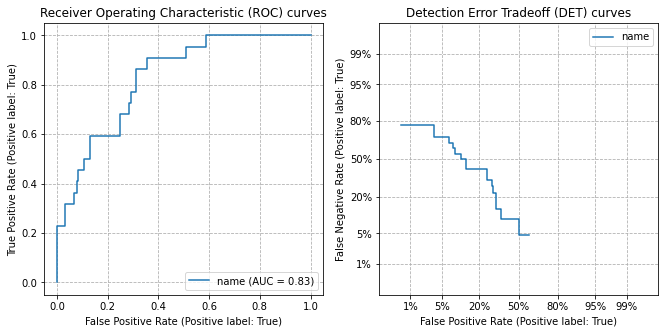

In [37]:

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

plot_roc_curve(grid_rfc, X_test, y_test, ax=ax_roc, name='name')
plot_det_curve(grid_rfc, X_test, y_test, ax=ax_det, name="name")


ax_roc.set_title('Receiver Operating Characteristic (ROC) curves')
ax_det.set_title('Detection Error Tradeoff (DET) curves')

ax_roc.grid(linestyle='--')
ax_det.grid(linestyle='--')

plt.legend()
plt.show()

In [38]:

kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=0)
cross_val_score(gpc, X_train, y_train, cv=10, scoring='f1').mean()

0.0

In [39]:
y_train.shape

(1783,)

In [40]:

clf = DecisionTreeClassifier()
cross_val_score(clf, X_train, y_train, cv=10, scoring='f1').mean()

0.28374102447072413

In [41]:
scl = StandardScaler()
X_ = scl.fit_transform(X)
pca = PCA()
pca.fit(X_)

PCA()

In [42]:
pca.explained_variance_ratio_

array([0.26941272, 0.13349727, 0.11959786, 0.09083819, 0.08301012,
       0.06809204, 0.06451701, 0.06058571, 0.04323618, 0.0329199 ,
       0.02236043, 0.01193258])

In [43]:
clf = LinearSVC(tol=1e-3)
parameters = { 
    'max_iter': [1000],

}
grid_lsvc = GridSearchCV(clf, parameters, verbose=2, return_train_score=True, scoring='f1', n_jobs=-1,)
grid_lsvc.fit(X_train, y_train)
y_pred = grid_lsvc.predict(X_test)
confusion_matrix(y_test, y_pred)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/osboxes/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([[177,   0],
       [ 22,   0]])

In [44]:
clf = GaussianNB()
parameters = { 
    'var_smoothing': [1e-12],
}
grid_gnb = GridSearchCV(clf, parameters,verbose=2, return_train_score=True, scoring='f1', n_jobs=-1,)
grid_gnb.fit(X_train, y_train)
y_pred = grid_rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


array([[177,   0],
       [ 17,   5]])

In [45]:
clf = SVC()
parameters = { 
    'kernel':['rbf','sigmoid'],
    'gamma':[0.7],
    'C':[1]
}
grid_svc = GridSearchCV(clf, parameters,verbose=2, return_train_score=True, scoring='f1', n_jobs=-1,)
grid_svc.fit(X_train, y_train)
y_pred = grid_svc.predict(X_test)
confusion_matrix(y_test, y_pred)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


array([[177,   0],
       [ 19,   3]])

In [46]:
clf = AdaBoostClassifier()
parameters = { 
    'learning_rate': [1,2],
}
grid_abc = GridSearchCV(clf, parameters,verbose=2, return_train_score=True, scoring='f1', n_jobs=-1,)
grid_abc.fit(X_train, y_train)
y_pred = grid_abc.predict(X_test)
confusion_matrix(y_test, y_pred)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


array([[175,   2],
       [ 18,   4]])

In [47]:

clf = GradientBoostingClassifier()
parameters = { 
    'learning_rate': [0.1,2],
}
grid_gbc = GridSearchCV(clf, parameters,verbose=2, return_train_score=True, scoring='f1', n_jobs=-1,)
grid_gbc.fit(X_train, y_train)
y_pred = grid_gbc.predict(X_test)
confusion_matrix(y_test, y_pred)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


array([[176,   1],
       [ 19,   3]])

In [48]:


clf = MLPClassifier()
parameters = { 
    'solver':['lbfgs', 'sgd', 'adam'],
    'alpha': [1, 10],
    'learning_rate': ['adaptive']
}
grid_mlpc = GridSearchCV(clf, parameters,verbose=2, return_train_score=True, scoring='f1', n_jobs=-1,)
grid_mlpc.fit(X_train, y_train)
y_pred = grid_mlpc.predict(X_test)
confusion_matrix(y_test, y_pred)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


array([[177,   0],
       [ 22,   0]])

In [49]:
res = grid_rfc.cv_results_
train_score = res['mean_train_score']
test_score = res['mean_test_score']

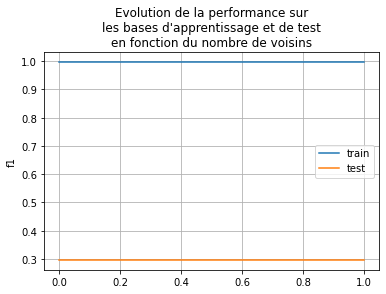

In [50]:
df_score = pd.DataFrame(dict(test=test_score, train=train_score))
ax = df_score.plot(y='train', figsize=(6, 4))
df_score.plot(y='test', ax=ax, grid=True)
ax.set_title("Evolution de la performance sur\nles bases d'apprentissage et de test" +
             "\nen fonction du nombre de voisins")
ax.set_ylabel("f1");

In [51]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
F1 = 2 * (precision * recall) / (precision + recall)
F1

<ipython-input-51-1ac4a2a067cf>:5: RuntimeWarning: invalid value encountered in double_scalars
  F1 = 2 * (precision * recall) / (precision + recall)


nan

In [52]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.28571428571428575

In [53]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.20942408376963348

In [54]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.28800000000000003